# Метод SSFM 2 порядка (с половинным линейным шагом справа, но с аппроксимацией нелинейного шага)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка численного решения

In [2]:
dfEnveloper = pd.read_csv("collsm1Re.csv", sep = ",", header = None, skiprows = 1)
dfEnvelopei = pd.read_csv("collsm1Im.csv", sep = ",", header = None, skiprows = 1)
#dfEnvelope.head(5)
dfEnveloper

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,NaN,NaN,-16.500000,-16.371100,-16.242200,-16.113300,-15.984400,-15.855500,-15.726600,-15.597700,...,15.339800,15.468800,15.597700,15.726600,15.855500,15.984400,16.113300,16.242200,16.3711,NaN
1,0.000000,-0.000002,-0.000003,-0.000003,-0.000004,-0.000005,-0.000005,-0.000006,-0.000007,-0.000008,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,NaN
2,0.069030,-0.002288,-0.000186,0.001843,0.003436,0.004338,0.004428,0.003724,0.002376,0.000629,...,0.004200,0.002157,-0.000266,-0.002591,-0.004366,-0.005260,-0.005136,-0.004061,NaN,NaN
3,0.138059,-0.003186,-0.005602,-0.007421,-0.008404,-0.008433,-0.007518,-0.005782,-0.003433,-0.000737,...,0.004974,0.006075,0.006709,0.006680,0.005879,0.004312,0.002107,-0.000499,NaN,NaN
4,0.207089,-0.001082,-0.000673,-0.000294,0.000112,0.000624,0.001309,0.002195,0.003234,0.004286,...,-0.003546,-0.003684,-0.003638,-0.003415,-0.003044,-0.002572,-0.002055,-0.001546,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,9.664156,-0.004719,-0.005988,-0.007179,-0.008094,-0.008561,-0.008474,-0.007811,-0.006636,-0.005095,...,0.001742,0.000815,0.000005,-0.000652,-0.001222,-0.001823,-0.002575,-0.003546,NaN,NaN
142,9.733186,0.001520,0.001332,0.001414,0.001867,0.002666,0.003661,0.004616,0.005276,0.005450,...,-0.001920,-0.000970,-0.000010,0.000865,0.001536,0.001916,0.001982,0.001801,NaN,NaN
143,9.802216,0.008402,0.010478,0.012317,0.013636,0.014236,0.014059,0.013194,0.011834,0.010202,...,-0.007054,-0.004378,-0.002062,-0.000155,0.001444,0.002938,0.004535,0.006363,NaN,NaN
144,9.871245,-0.003488,-0.002283,-0.000169,0.002710,0.006108,0.009701,0.013132,0.016082,0.018332,...,0.004117,0.003740,0.002789,0.001362,-0.000314,-0.001931,-0.003171,-0.003754,NaN,NaN


In [3]:
x_rowr = dfEnveloper.iloc[0]
xr =  x_rowr.to_numpy()[2:-1]
Nr = np.size(xr)

In [4]:
x_rowi = dfEnvelopei.iloc[0]
xi =  x_rowi.to_numpy()[2:-1]
Ni = np.size(xi)

In [5]:
dfEnveloper = dfEnveloper.drop(dfEnveloper.columns[[-2, -1]], axis = 1) 
dfEnveloper = dfEnveloper.drop(0, axis = 0) 
dfEnveloper.head(5)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1,0.000000,-0.000002,-0.000003,-0.000003,-0.000004,-0.000005,-0.000005,-0.000006,-0.000007,-0.000008,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
2,0.069030,-0.002288,-0.000186,0.001843,0.003436,0.004338,0.004428,0.003724,0.002376,0.000629,...,0.005722,0.005466,0.004200,0.002157,-0.000266,-0.002591,-0.004366,-0.005260,-0.005136,-0.004061
3,0.138059,-0.003186,-0.005602,-0.007421,-0.008404,-0.008433,-0.007518,-0.005782,-0.003433,-0.000737,...,0.002326,0.003646,0.004974,0.006075,0.006709,0.006680,0.005879,0.004312,0.002107,-0.000499
4,0.207089,-0.001082,-0.000673,-0.000294,0.000112,0.000624,0.001309,0.002195,0.003234,0.004286,...,-0.002825,-0.003244,-0.003546,-0.003684,-0.003638,-0.003415,-0.003044,-0.002572,-0.002055,-0.001546
5,0.276119,-0.002629,-0.003424,-0.004022,-0.004516,-0.005014,-0.005601,-0.006303,-0.007064,-0.007745,...,0.005850,0.006261,0.006413,0.006144,0.005392,0.004215,0.002758,0.001203,-0.000285,-0.001583


In [6]:
dfEnvelopei = dfEnvelopei.drop(dfEnvelopei.columns[[-2, -1]], axis = 1) 
dfEnvelopei = dfEnvelopei.drop(0, axis = 0) 
dfEnvelopei.head(5)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1,0.000000,-0.000003,-0.000004,-0.000004,-0.000005,-0.000005,-0.000006,-0.000006,-0.000007,-0.000008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.069030,0.000467,0.001117,0.001730,0.002163,0.002271,0.001965,0.001251,0.000241,-0.000867,...,-0.000416,-0.001293,-0.001840,-0.002040,-0.001963,-0.001713,-0.001383,-0.001018,-0.000608,-0.000120
3,0.138059,-0.000008,0.002096,0.003813,0.004966,0.005475,0.005351,0.004664,0.003514,0.002028,...,0.000528,-0.001766,-0.003850,-0.005547,-0.006698,-0.007180,-0.006920,-0.005927,-0.004300,-0.002237
4,0.207089,0.013177,0.010486,0.006728,0.002393,-0.001916,-0.005609,-0.008244,-0.009628,-0.009839,...,-0.008307,-0.006436,-0.003755,-0.000414,0.003304,0.007029,0.010363,0.012925,0.014386,0.014505
5,0.276119,0.001011,0.004024,0.006180,0.007507,0.008198,0.008499,0.008590,0.008525,0.008235,...,-0.006963,-0.009724,-0.012198,-0.014048,-0.014935,-0.014603,-0.012967,-0.010164,-0.006556,-0.002654


In [7]:
tr = dfEnveloper[0].to_numpy()
dfEnveloper = dfEnveloper.drop(dfEnveloper.columns[0], axis = 1) 
Mr = np.size(tr)
dfEnveloper

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
1,-0.000002,-0.000003,-0.000003,-0.000004,-0.000005,-0.000005,-0.000006,-0.000007,-0.000008,-0.000010,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
2,-0.002288,-0.000186,0.001843,0.003436,0.004338,0.004428,0.003724,0.002376,0.000629,-0.001208,...,0.005722,0.005466,0.004200,0.002157,-0.000266,-0.002591,-0.004366,-0.005260,-0.005136,-0.004061
3,-0.003186,-0.005602,-0.007421,-0.008404,-0.008433,-0.007518,-0.005782,-0.003433,-0.000737,0.001997,...,0.002326,0.003646,0.004974,0.006075,0.006709,0.006680,0.005879,0.004312,0.002107,-0.000499
4,-0.001082,-0.000673,-0.000294,0.000112,0.000624,0.001309,0.002195,0.003234,0.004286,0.005143,...,-0.002825,-0.003244,-0.003546,-0.003684,-0.003638,-0.003415,-0.003044,-0.002572,-0.002055,-0.001546
5,-0.002629,-0.003424,-0.004022,-0.004516,-0.005014,-0.005601,-0.006303,-0.007064,-0.007745,-0.008161,...,0.005850,0.006261,0.006413,0.006144,0.005392,0.004215,0.002758,0.001203,-0.000285,-0.001583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,-0.004719,-0.005988,-0.007179,-0.008094,-0.008561,-0.008474,-0.007811,-0.006636,-0.005095,-0.003380,...,0.003194,0.002625,0.001742,0.000815,0.000005,-0.000652,-0.001222,-0.001823,-0.002575,-0.003546
142,0.001520,0.001332,0.001414,0.001867,0.002666,0.003661,0.004616,0.005276,0.005450,0.005065,...,-0.003651,-0.002807,-0.001920,-0.000970,-0.000010,0.000865,0.001536,0.001916,0.001982,0.001801
143,0.008402,0.010478,0.012317,0.013636,0.014236,0.014059,0.013194,0.011834,0.010202,0.008488,...,-0.012600,-0.009891,-0.007054,-0.004378,-0.002062,-0.000155,0.001444,0.002938,0.004535,0.006363
144,-0.003488,-0.002283,-0.000169,0.002710,0.006108,0.009701,0.013132,0.016082,0.018332,0.019800,...,0.003511,0.003974,0.004117,0.003740,0.002789,0.001362,-0.000314,-0.001931,-0.003171,-0.003754


In [8]:
ti = dfEnvelopei[0].to_numpy()
dfEnvelopei = dfEnvelopei.drop(dfEnvelopei.columns[0], axis = 1) 
Mi = np.size(ti)
dfEnvelopei

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
1,-0.000003,-0.000004,-0.000004,-0.000005,-0.000005,-0.000006,-0.000006,-0.000007,-0.000008,-0.000008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000467,0.001117,0.001730,0.002163,0.002271,0.001965,0.001251,0.000241,-0.000867,-0.001842,...,-0.000416,-0.001293,-0.001840,-0.002040,-0.001963,-0.001713,-0.001383,-0.001018,-0.000608,-0.000120
3,-0.000008,0.002096,0.003813,0.004966,0.005475,0.005351,0.004664,0.003514,0.002028,0.000366,...,0.000528,-0.001766,-0.003850,-0.005547,-0.006698,-0.007180,-0.006920,-0.005927,-0.004300,-0.002237
4,0.013177,0.010486,0.006728,0.002393,-0.001916,-0.005609,-0.008244,-0.009628,-0.009839,-0.009178,...,-0.008307,-0.006436,-0.003755,-0.000414,0.003304,0.007029,0.010363,0.012925,0.014386,0.014505
5,0.001011,0.004024,0.006180,0.007507,0.008198,0.008499,0.008590,0.008525,0.008235,0.007597,...,-0.006963,-0.009724,-0.012198,-0.014048,-0.014935,-0.014603,-0.012967,-0.010164,-0.006556,-0.002654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,-0.007239,-0.006817,-0.005702,-0.004195,-0.002647,-0.001355,-0.000507,-0.000157,-0.000247,-0.000641,...,0.002905,0.003162,0.003185,0.002789,0.001841,0.000326,-0.001618,-0.003701,-0.005548,-0.006804
142,-0.010507,-0.011905,-0.012608,-0.012500,-0.011533,-0.009765,-0.007390,-0.004715,-0.002112,0.000065,...,0.017157,0.014626,0.011780,0.008731,0.005590,0.002452,-0.000604,-0.003507,-0.006186,-0.008556
143,0.013426,0.011149,0.008295,0.005050,0.001630,-0.001759,-0.004963,-0.007889,-0.010483,-0.012696,...,0.012773,0.012361,0.012550,0.013187,0.014074,0.014993,0.015728,0.016079,0.015880,0.015013
144,0.002270,0.004305,0.006024,0.007240,0.007895,0.008037,0.007756,0.007139,0.006238,0.005077,...,0.013749,0.009387,0.005625,0.002469,-0.000028,-0.001754,-0.002591,-0.002472,-0.001463,0.000227


In [9]:
#строка - модуль в опр момент времени, столбец - модуль в опр координате
qr = np.zeros((Nr, Mr))
for n in range(Nr):
    for m in range(Mr):
        qr[n, m] = dfEnveloper[n + 1].loc[dfEnveloper.index[m]]
qi = np.zeros((Ni, Mi))
for n in range(Ni):
    for m in range(Mi):
        qi[n, m] = dfEnvelopei[n + 1].loc[dfEnvelopei.index[m]]

# Подсчёт аналитики

In [10]:
from math import pi
N_an = Nr
L_an = xr[-1] - xr[0]
T_an = tr[-1] - tr[0]
tau = tr[1] - tr[0]
M_an = np.size(tr) 
A = 0.2
a = 0.5
b = 0.5
alpha = 1.
k = -0.25
x_0 = -5.
thetta_0 = 0.

In [11]:
tr[-1] - tr[0], T_an

(9.940274991, 9.940274991)

In [12]:
omega = (120 * A * A + 2141 * 4 * a * b) / (256 * 4 * a * b);

eps = 24 * pow(4 * a * b, 2) / pow(A, 4);

chi = -(4 * A * A + 332 * a * b) / (32 * a * b);

v = -(1 + 4 * chi) / 8; 

In [13]:
x_an = np.linspace(-L_an/2, L_an/2, N_an)
t_an = np.arange(0., T_an, tau)

q_an = np.zeros((int(N_an), int(M_an)), dtype=complex)

In [14]:
T_period = L_an / (2 * v)  # Время прохождения половины области

for m in range(M_an):
    t_current = t_an[m]
    
    # Вычисляем смещение с учетом периодичности
    x_shift = v * t_current
    
    # Приводим смещение к основному периоду [-L_an/2, L_an/2)
    x_shift = x_shift % L_an
    if x_shift > L_an/2:
        x_shift -= L_an
    
    t_shift = omega * t_current + thetta_0
    
    for n in range(N_an):
        # Периодическое продолжение для x с учетом смещения
        x_periodic = x_an[n] - x_shift
        x_periodic = x_periodic - L_an * np.floor((x_periodic + L_an/2) / L_an)
        
        phi = k * x_periodic - t_shift
        
        exp_plus = np.exp(alpha * (x_periodic - x_0))
        exp_minus = np.exp(-alpha * (x_periodic - x_0))
        
        q_an[n, m] = A * np.exp(1j * phi) / (a * exp_plus + b * exp_minus)

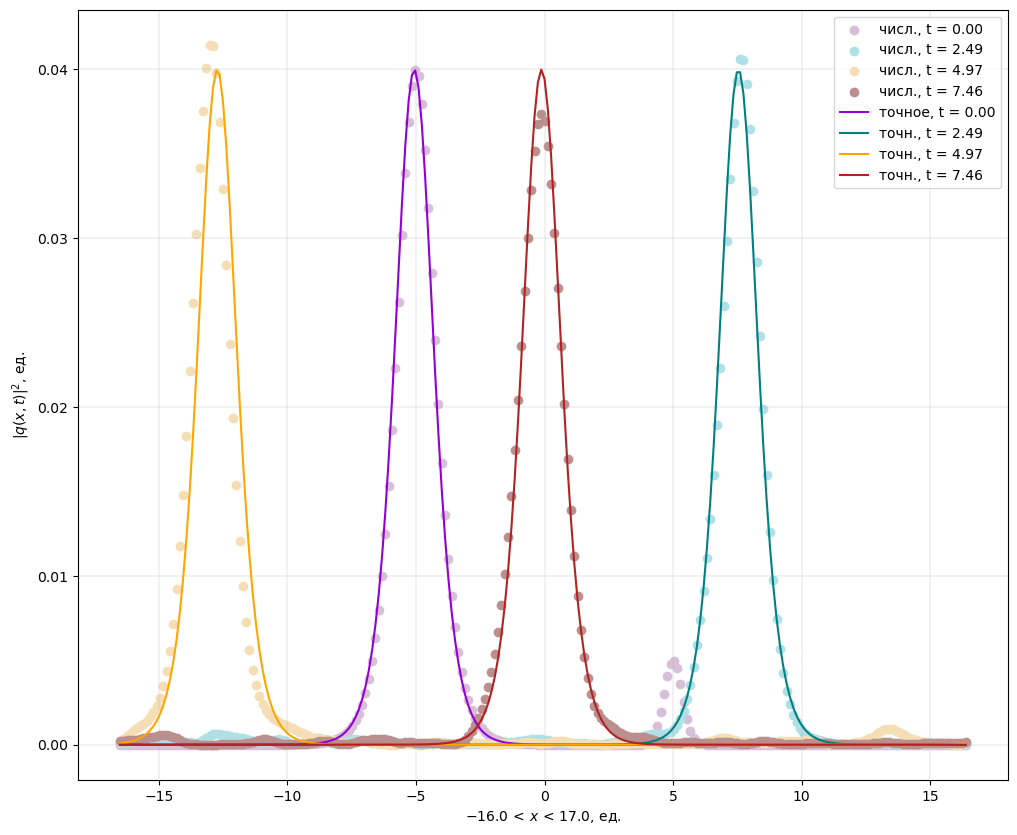

In [15]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(xi, qr[:, 0 + 0]**2 + qi[:, 0 + 0]**2, color = "thistle", label = 'числ., t = 0.00')
plt.scatter(xi, qr[:, int(np.size(ti)/4) + 0]**2 + qi[:, int(np.size(ti)/4) + 0]**2, color = "powderblue", label = f'числ., t = {np.round(T_an / 4, 2)}')
plt.scatter(xi, qr[:, int(np.size(ti)/2) + 0]**2 + qi[:, int(np.size(ti)/2) + 0]**2, color = "wheat", label = f'числ., t = {np.round(T_an / 2, 2)}')
plt.scatter(xi, qr[:, 3 * int(np.size(ti)/4) + 0]**2 + qi[:, 3 * int(np.size(ti)/4) + 0]**2, color = "rosybrown", label = f'числ., t = {np.round(3 * T_an / 4, 2)}')
plt.plot(xi, q_an[:, 0 + 0].real**2 + q_an[:, 0 + 0].imag**2, color = "darkviolet", label = f'точное, t = 0.00')
plt.plot(xi, q_an[:, int(np.size(ti)/4) + 0].real**2 + q_an[:, int(np.size(ti)/4) + 0].imag**2, color = "teal", label = f'точн., t = {np.round(T_an / 4, 2)}')
plt.plot(xi, q_an[:, int(np.size(ti)/2) + 0].real**2 + q_an[:, int(np.size(ti)/2) + 0].imag**2, color = "orange", label = f'точн., t = {np.round(T_an / 2, 2)}')
plt.plot(xi, q_an[:, 3 * int(np.size(ti)/4) + 0].real**2 + q_an[:, 3 * int(np.size(ti)/4) + 0].imag**2, color = "firebrick", label = f'точн., t = {np.round(3 * T_an / 4, 2)}')
plt.grid(lw = 0.25)
plt.ylabel(f"|$q(x, t)|^2$, ед.")
plt.xlabel(f"${np.round(np.min(x_an), 0)}\, < \, x \, < \, {np.round(np.max(x_an) + x_an[-1] - x_an[-2], 0)}$, ед.")

plt.legend();

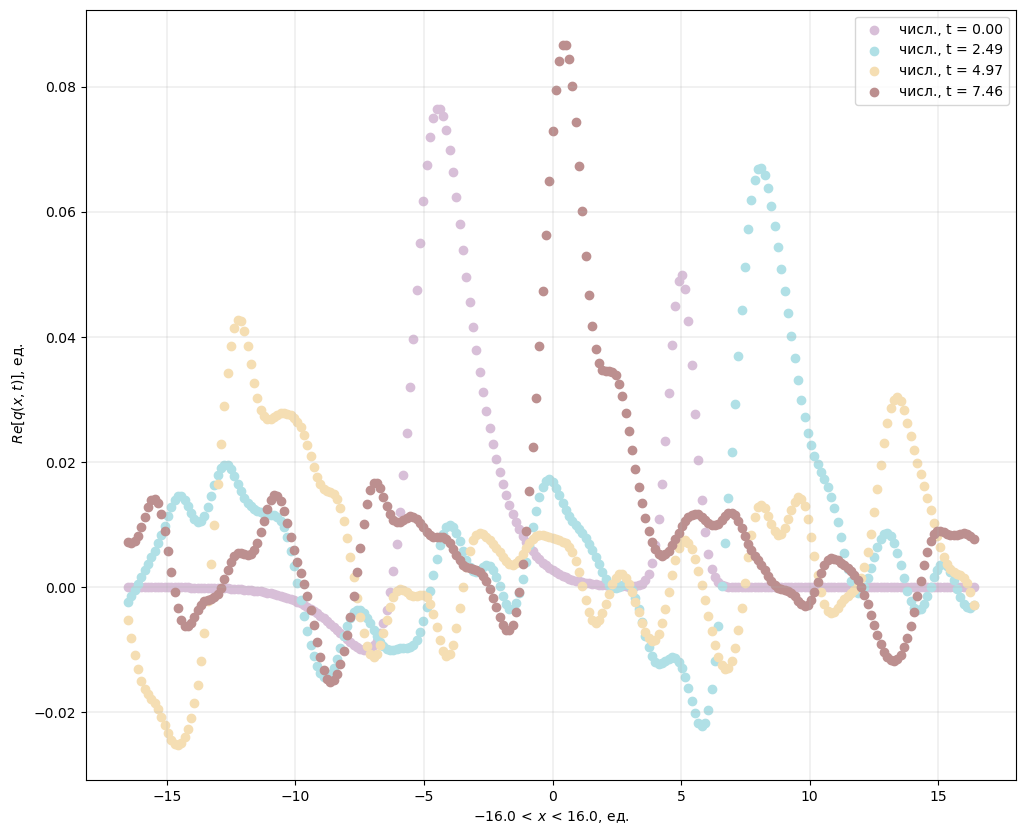

In [16]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(xr, qr[:, 0 + 0], color = "thistle", label = 'числ., t = 0.00')
plt.scatter(xr, qr[:, int(np.size(tr)/4) + 0], color = "powderblue", label = f'числ., t = {np.round(T_an / 4, 2)}')
plt.scatter(xr, qr[:, int(np.size(tr)/2) + 0], color = "wheat", label = f'числ., t = {np.round(T_an / 2, 2)}')
plt.scatter(xr, qr[:, int(3*np.size(tr)/4) + 0], color = "rosybrown", label = f'числ., t = {np.round(3 * T_an / 4, 2)}')
plt.grid(lw = 0.25)
plt.ylabel(f" $Re[q(x, t)]$, ед.")
plt.xlabel(f"${np.round(np.min(xr), 0)}\, < \, x \, < \, {np.round(np.max(xr) + xr[-1] - xr[-2], 0)}$, ед.")
plt.legend()

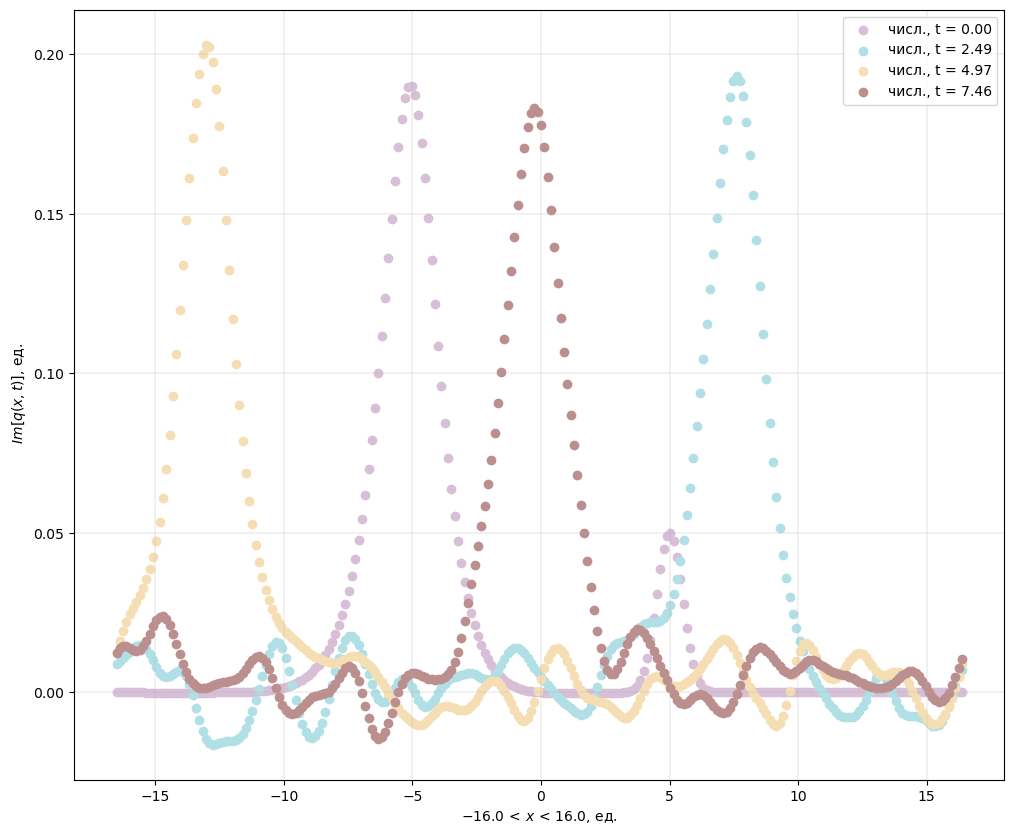

In [17]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(xi, qi[:, 0 + 0], color = "thistle", label = 'числ., t = 0.00')
plt.scatter(xi, qi[:, int(np.size(ti)/4) + 0], color = "powderblue", label = f'числ., t = {np.round(T_an / 4, 2)}')
plt.scatter(xi, qi[:, int(np.size(ti)/2) + 0], color = "wheat", label = f'числ., t = {np.round(T_an / 2, 2)}')
plt.scatter(xi, qi[:, int(3*np.size(ti)/4) + 0], color = "rosybrown", label = f'числ., t = {np.round(3 * T_an / 4, 2)}')
plt.grid(lw = 0.25)
plt.ylabel(f" $Im[q(x, t)]$, ед.")
plt.xlabel(f"${np.round(np.min(xi), 0)}\, < \, x \, < \, {np.round(np.max(xi) + xi[-1] - xi[-2], 0)}$, ед.")
plt.legend()

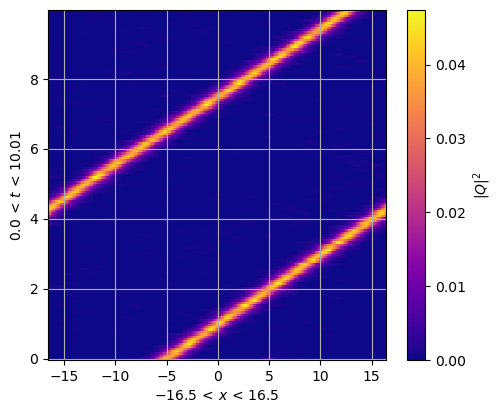

In [18]:
T, X = np.meshgrid(tr, xr)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(221)
graph = ax.pcolormesh(X, T , np.array(qr)**2 + np.array(qi[:, : ])**2, cmap = 'plasma')
ax.set_ylabel(f"${np.min(tr)}\, < \, t \, < \, {np.round(np.max(tr) + tr[-1] - tr[-2], 2)}$")
ax.set_xlabel(f"${np.min(xr)}\, < \, x \, < \, {np.round(np.max(xr) + xr[-1] - xr[-2], 2)}$")
ax.grid()
colbar = fig.colorbar(graph)
colbar.set_label("$|Q|^2$", rotation = 90)

#DFT

Text(0.5, 0, '$|q|^2$')

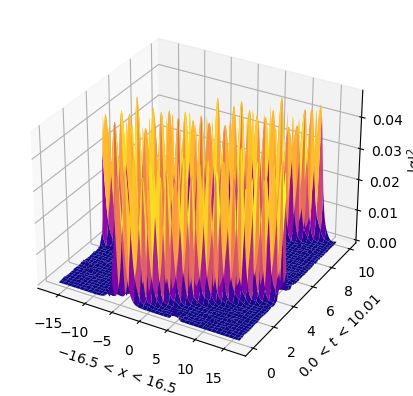

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, T,  np.array(qr)**2 + np.array(qi[:, : ])**2, cmap = 'plasma')
ax.set_ylabel(f"${np.min(tr)}\, < \, t \, < \, {np.round(np.max(tr) + tr[-1] - tr[-2], 2)}$")
ax.set_xlabel(f"${np.min(xr)}\, < \, x \, < \, {np.round(np.max(xr) + xr[-1] - xr[-2], 2)}$")
ax.set_zlabel(f"$|q|^2$")

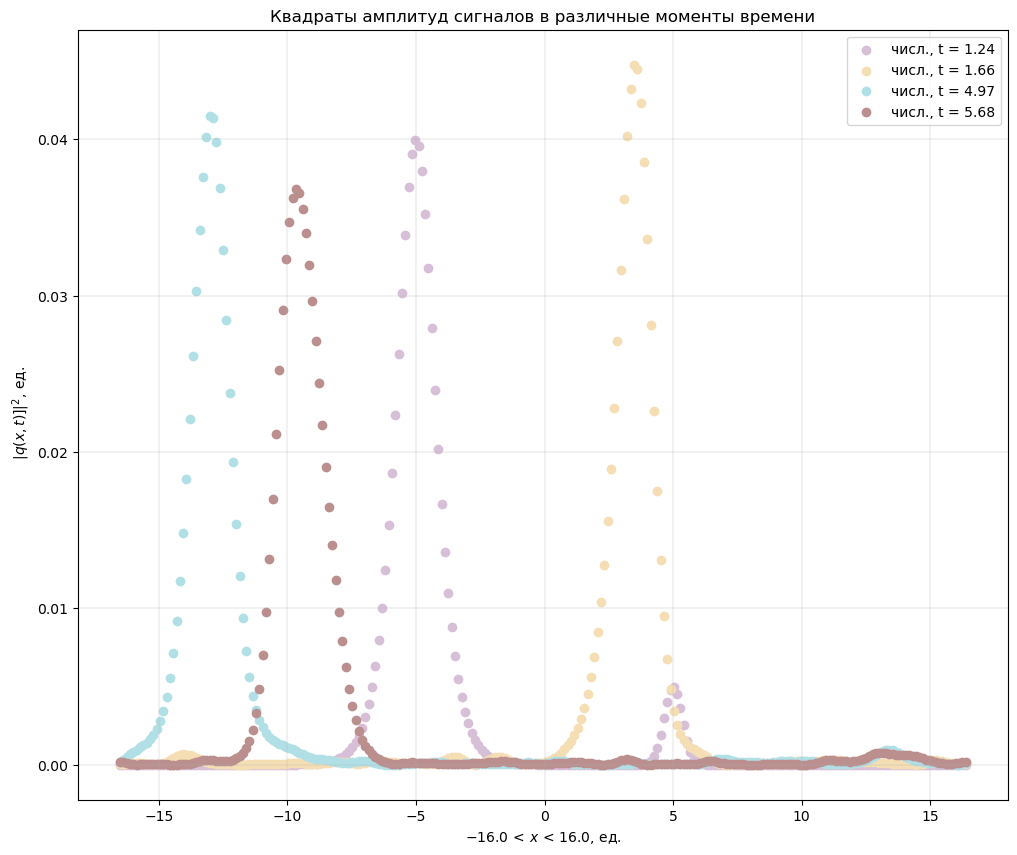

In [20]:
fig = plt.figure(figsize=(12, 10))
plt.grid(lw = 0.25)
plt.ylabel(f" $|q(x, t)]|^2$, ед.")
plt.scatter(xr, np.array(qr[:, 0])**2 + np.array(qi[:, 0])**2, color = "thistle", label = f'числ., t = {np.round(T_an/8, 2)}')
plt.scatter(xr, np.array(qr[:, int(np.size(ti)/6)])**2 + np.array(qi[:, int(np.size(ti)/6)])**2, color = "wheat", label = f'числ., t = {np.round(T_an/6, 2)}')
plt.scatter(xr, np.array(qr[:, int(np.size(ti)/2)])**2 + np.array(qi[:, int(np.size(ti)/2)])**2, color = "powderblue", label = f'числ., t = {np.round(T_an/2, 2)}')
plt.scatter(xr, np.array(qr[:,int(np.size(ti)/1.75)])**2 + np.array(qi[:, int(np.size(ti)/1.75)])**2, color = "rosybrown", label = f'числ., t = {np.round(T_an/1.75, 2)}')
plt.xlabel(f"${np.round(np.min(xi), 0)}\, < \, x \, < \, {np.round(np.max(xi) + xi[-1] - xi[-2], 0)}$, ед.")
plt.title('Квадраты амплитуд сигналов в различные моменты времени')
plt.legend()

In [21]:
st = 1
amp_an = np.abs(q_an[:, :-st])       # Амплитуда аналитического сигнала
amp_num1 = np.abs(qr[:, :-st] + 1j * qi[:, :-st]) 
diff1 = np.linalg.norm(amp_num1 - amp_an, axis=0, ord=2) / np.size(q_an,axis=0)
                       #np.inf)

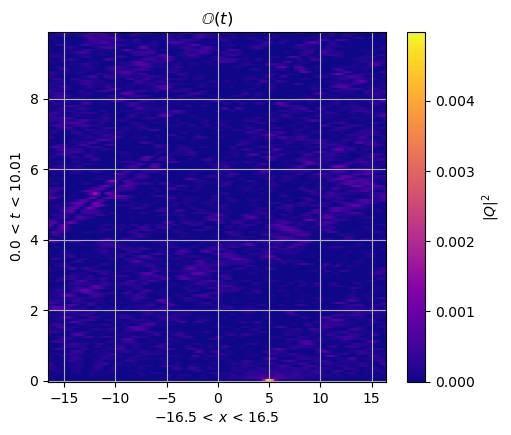

In [22]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(221)
ax.set_title(r"$\mathbb{O}(t)$")
graph = ax.pcolormesh(X[:, :-st], T[:, :-st], (amp_an - amp_num1)**2, cmap = 'plasma')
ax.set_ylabel(f"${np.min(tr)}\, < \, t \, < \, {np.round(np.max(tr) + tr[-1] - tr[-2], 2)}$")
ax.set_xlabel(f"${np.min(xr)}\, < \, x \, < \, {np.round(np.max(xr) + xr[-1] - xr[-2], 2)}$")
ax.grid()
colbar = fig.colorbar(graph)
colbar.set_label("$|Q|^2$", rotation = 90)



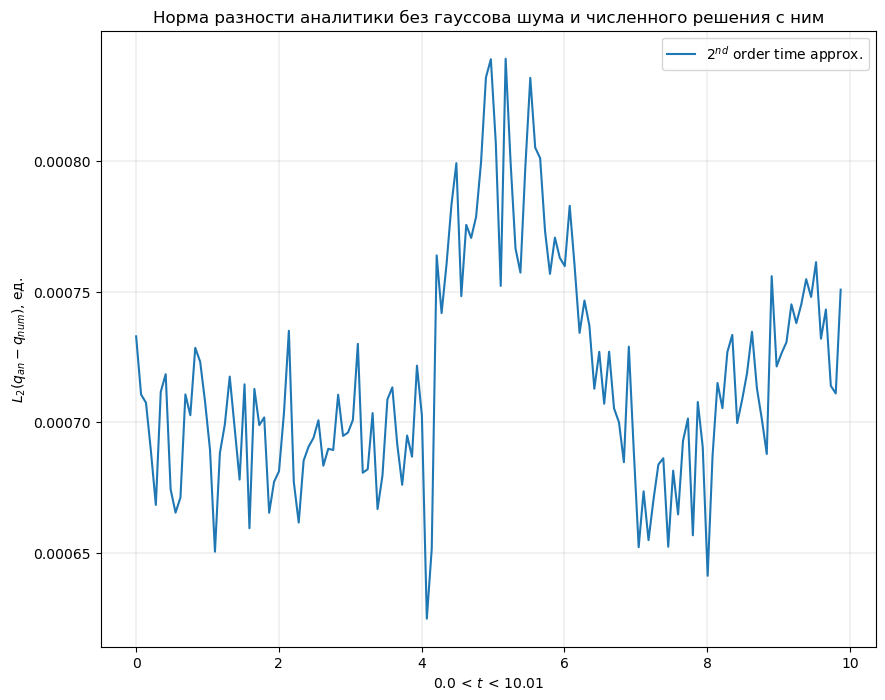

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

graph = ax.plot(tr[:-st], diff1, label = '$2^{nd}$ order time approx.')

plt.grid(lw = 0.25)
plt.legend()
plt.title(r"Норма разности аналитики без гауссова шума и численного решения с ним")
plt.ylabel(r"$L_{2}(q_{an} - q_{num})$, ед.")
           #\infty}(q_{an} - q_{num})$, ед.")
plt.xlabel(f"${np.min(tr)}\, < \, t \, < \, {np.round(np.max(tr) + tr[-1] - tr[-2], 2)}$");